In [27]:
%%writefile split.py
import numpy as np
import pandas as pd
from os import listdir
from os.path import join


def load_data(size_flag):
#     tracks.to_csv('raw/%s/tracks.csv'%size_flag,index=False)
#     albums.to_csv('raw/%s/albums.csv'%size_flag,index=False)
#     artists.to_csv('raw/%s/artists.csv'%size_flag,index=False)
    playlists=pd.read_csv('raw/%s/playlists.csv'%size_flag)
#     album_track.to_csv('raw/%s/album_tracks.csv'%size_flag,index=False)
#     artist_track.to_csv('raw/%s/artist_tracks.csv'%size_flag,index=False)
#     playlist_track.to_csv('raw/%s/playlist_tracks.csv'%size_flag,index=False)
    return playlists

def split_data(playlists,test_size=0.1,seed=24):
    np.random.seed=seed
    test_track_nums=[0,1,5,5,10,10,25,25,100,100]
    rnd_idx=np.random.permutation(playlists.shape[0])
    sel_num=int(playlists.shape[0]*test_size)//len(test_track_nums)
    test_idx=set([-1])
    for i in range(len(test_track_nums)):
        k=0
        for j in rnd_idx:
            if playlists.iloc[j].num_tracks >= test_track_nums[i]:
                if j not in test_idx:
                    test_idx.add(j)
                    k+=1
                    if k==sel_num:
                        break
    test_idx.remove(-1)
    playlists_test=playlists.loc[test_idx]
    playlists_train=playlists.loc[playlists.index.difference(playlists_test.index)]
    return playlists_train,playlists_test
    


Writing split.py


In [ ]:
playlists=load_data('small')
playlists_train,playlists_val=split_data(playlists,test_size=0.1)
playlists_train.shape[0],playlists_val.shape[0]

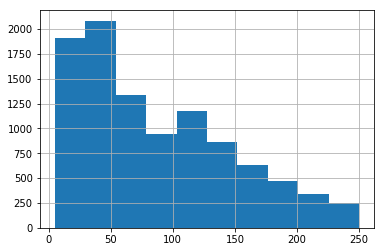

In [24]:

playlists=load_data('large')
playlists_train,playlists_val=split_data(playlists,test_size=0.01)
playlists_train.shape[0],playlists_val.shape[0]
playlists_val.num_tracks.hist()

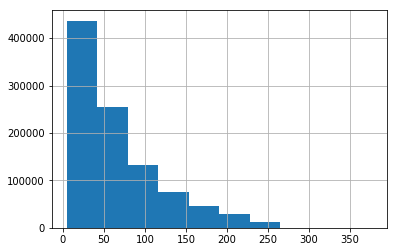

In [25]:
playlists_train.num_tracks.hist()